## How fast is your Computing Machine?

Our computers do basically two things, one is storing numbers, the other is doing mathematical operations on them. They are so useful because they do these things extraordinarily fast and extraordinarily well, in the sense that they always do them correctly following our instructions. For this reason the main way in which we use them is to give them repetitive instructions for up to billions of times.

Since the speed of the CPU has doubled every 1.5 years until a few years ago (Moore’s Law), we may have lost track of how really fast the computer in our hands is. When starting this journey into numerical modeling, it is important to first quickly experiment this and not only realize how remarkably fast it really is, but also to perceive its limits when we reach them.

In this chapter, we start using iPython because its interactive setting allows us to feel better about what the computer does. Later we will step into writing and running a program. Let us initially load NumPy:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

And let's create a little function that simply counts up to a value *max*. 

In [280]:
# this function simply counts from 0 to max
def count(max):
    i=0
    while i<max:
        i=i+1
    print('done!')

In [4]:
count(10000)

done!


When I try to launch count(1000) or count(100000) on my laptop I simply do not observe any difference. Just the time to call the function, and I get the result. It is unnoticeable that the second call required 100 times more calculation than the first one. Only when I arrive at one million or better ten millions, I finally observe a lag. In fact what I notice is the time that it takes for one processor of my laptop to perform this serial calculation. You can test yours and perceive the power of your computer.

We can also be more quantitative about the time required by our little routine. iPython offers a very simple and powerful magic command called %timeit. Let us test it for testing the time required by our loop:

The %timeit command is used to calculate the average time of performing certain operations in python. As an example let us use this command to calculate the time that it takes to count from 0 to max in the above function. 

### Exercise 1

Use the command %timeit to calculate how long it takes to the function *Count()* to count up to:

a) 100000 

b) 1000000 

c) 10000000

In [279]:
#here put your solution for (a) and create two more cells for (b) and (c)
def count(max):
    i=0
    if i<max:
        i+=1
%timeit count(100000)


183 ns ± 12.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [3]:
%timeit count(1000000)

165 ns ± 8.43 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Let's look at the computing times that you find. Are they proportional to how much the funcion counts? Why? Can you now estimate how fast is your computer? 

Let's now create a sligtly more sophisticate function, which adds the first *max* numbers instead of simply counting them:

In [4]:
%timeit count(10000000)

207 ns ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
# also this function counts, but increasingly larger numbers
def addCount(max):
    a=0.0
    for i in range(max):
        a=a+i

### Exercise 2

Use the command %timeit to calculate how long it takes to the function *addCount()* to sum numbers up to:

a) 100000 

b) 1000000 

c) 10000000


In [5]:
#here put your solution for (a) and create two more cells for (b) and (c)

def addCount(max):
    a=0.0
    for i in range(max):
        a=a+i
%timeit addCount(100000)



7.05 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


As before, comments on the computing times that you find. Here...

It takes almost the same! 




In [6]:
%timeit addCount(1000000)

75 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## NumPy 

Let's focus on the Numerical Tools of Python. Among others, NumPy adds to standard Python the following features:   

In [7]:
%timeit addCount(10000000)

775 ms ± 61.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


>A. Multidimensional vectorized arrays<br />
>B. Mathematical functions operating on an array or portions of it<br />
>C. Linear Algebra, Fourier development, Random Functions<br />
      D. Input/Output functions to efficiently create and read memory mapped files<br />
      
Let's start from the NumPy Types 

### NumPy Types

Without any further specification, Python automatically uses float type machine precision. We might not know which precision this is, in which case it is important to discover it. A very straightforward way to discover the precision of our machine is by testing for which small ε, a and a + ε become indistinguishable. We can do so by iteratively decreasing ε of a certain ratio:

In [8]:
epsilon, ratio = 1.0, 9.0 
while (epsilon):
    print('Precision:',epsilon) 
    epsilon /= ratio

Precision: 1.0
Precision: 0.1111111111111111
Precision: 0.012345679012345678
Precision: 0.0013717421124828531
Precision: 0.00015241579027587256
Precision: 1.6935087808430286e-05
Precision: 1.8816764231589206e-06
Precision: 2.0907515812876894e-07
Precision: 2.323057312541877e-08
Precision: 2.5811747917131966e-09
Precision: 2.867971990792441e-10
Precision: 3.1866355453249343e-11
Precision: 3.5407061614721493e-12
Precision: 3.934117957191277e-13
Precision: 4.371242174656974e-14
Precision: 4.85693574961886e-15
Precision: 5.396595277354289e-16
Precision: 5.996216974838099e-17
Precision: 6.6624633053756655e-18
Precision: 7.402737005972962e-19
Precision: 8.225263339969957e-20
Precision: 9.139181488855508e-21
Precision: 1.0154646098728343e-21
Precision: 1.1282940109698158e-22
Precision: 1.2536600121886843e-23
Precision: 1.392955569098538e-24
Precision: 1.5477284101094868e-25
Precision: 1.7196982334549854e-26
Precision: 1.9107758149499837e-27
Precision: 2.1230842388333153e-28
Precision: 2.35898

The last line indicates that the precision that standard Python assumes on my machine is $10^{−324}$. This is indeed associated to a 64-bit float number. One can verify this by setting a smaller precision in the first line of this sequence. 

### Exercise 3

Test with the above routine the precision of the following types:

a) np.float16()

b) np.float32()

Google now all the other types of Float available on NumPy and check which ones work on this machine (why some may not?).

In [13]:
import numpy as np
epsilon, ratio = np.float16(1.0),np.float16(9.0) 
while (epsilon):
    print('Precision:',epsilon) 
    epsilon /= ratio
#epsilon, ratio = np.float128(1.0),np.float128(9.0)
#float128 does not work
epsilon, ratio = np.float32(1.0),np.float32(9.0)

while (epsilon):
    print('Precision:',epsilon) 
    epsilon /= ratio

Precision: 1.0
Precision: 0.1111
Precision: 0.012344
Precision: 0.001371
Precision: 0.0001523
Precision: 1.69e-05
Precision: 1.9e-06
Precision: 2.4e-07
Precision: 1.0
Precision: 0.11111111
Precision: 0.012345679
Precision: 0.0013717421
Precision: 0.00015241579
Precision: 1.6935088e-05
Precision: 1.8816764e-06
Precision: 2.0907515e-07
Precision: 2.3230573e-08
Precision: 2.5811748e-09
Precision: 2.867972e-10
Precision: 3.1866357e-11
Precision: 3.5407064e-12
Precision: 3.934118e-13
Precision: 4.3712423e-14
Precision: 4.856936e-15
Precision: 5.3965957e-16
Precision: 5.996218e-17
Precision: 6.662464e-18
Precision: 7.402738e-19
Precision: 8.225264e-20
Precision: 9.1391825e-21
Precision: 1.0154648e-21
Precision: 1.1282942e-22
Precision: 1.2536603e-23
Precision: 1.3929559e-24
Precision: 1.5477288e-25
Precision: 1.7196987e-26
Precision: 1.9107763e-27
Precision: 2.1230847e-28
Precision: 2.3589831e-29
Precision: 2.6210923e-30
Precision: 2.9123249e-31
Precision: 3.2359164e-32
Precision: 3.5954625e

Similarly to float, there exist integers with several precisions: np.int32, np.int64, np.int128. The type of every NumPy variable can be retrieved the dtype, e.g., eps.dtype.

It is very important to keep in mind the importance of precision. All the mathematical routines implemented in Python, as well as in any other language, follow the standards determined by IEEE which imply that they are all corrected to the last digit. Therefore, when we will model a physical system we can be sure that errors will not propagate quickly to lower digits with every algorithm that does not explicitly remove this information.

## Vectorization 
Vectorization is a technique that allows the programmer to replace the loops in vector/matrix operations with a unique call on an entire vector, or matrix. The vectorization makes the program look simple and also facilites the parallization. 

Let's consider for example matrix multiplications. Here we will replance loops with vectorized calls. 

Example: matrix multiplication using loop (non-vectorized algorithm)

In [27]:
import numpy as np
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
c=np.zeros((2,2),int)

def myMultiplication(a,b,c):
    size=np.shape(a)[0]
    for i in np.arange(size):
        for j in np.arange(size):
            sum=0;
            for k in np.arange(size):
                sum+=a[i, k] * b[k ,j];
            c[i,j]=sum
    return c

%timeit myMultiplication(a,b,c)
c= myMultiplication(a,b,c)
print(c)

24.1 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[[19 22]
 [43 50]]


Example: Matrix multiplication using vectorized algorithm

In [28]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
c=np.matmul(a,b)
print(c)

size=np.shape(a)[0]
print(size)


[[19 22]
 [43 50]]
2


### Exercise 4

Create two larger arrays of measure 10 x 10 (for example using arange and reshape, but there are other ways). And multiply them with the two techniques above. If you put them in a function, you can also %timeit these operations.

In [21]:
a1=np.random.randint(1,100,100).reshape(10,10)
a2=np.random.randint(1,100,100).reshape(10,10)
a3=np.zeros((10,10))
def myMultiplication(a,b,c):
    size=np.shape(a)[0]
    for i in np.arange(size):
        for j in np.arange(size):
            sum=0;
            for k in np.arange(size):
                sum+=a[i, k] * b[k ,j];
            c[i,j]=sum
    return c

%timeit myMultiplication(a1,a2,a3)
c= myMultiplication(a1,a2,a3)
print(c)


918 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[[26839. 41286. 28649. 26177. 31047. 15201. 33362. 27693. 30594. 38652.]
 [24964. 36773. 26056. 26685. 32223. 15495. 32633. 20786. 27581. 35979.]
 [20006. 32244. 21762. 24634. 24678. 14131. 28830. 14940. 20263. 31255.]
 [16576. 17458. 16762. 17006. 16141.  7859. 17285. 14267. 11780. 23644.]
 [20672. 33489. 27769. 22475. 32650. 12456. 24803. 27014. 26599. 33608.]
 [31950. 40737. 24281. 25806. 27435. 14669. 36030. 23699. 27116. 42513.]
 [20048. 31172. 26923. 26508. 29243. 14532. 25734. 20746. 23559. 28684.]
 [25214. 34863. 24101. 22848. 27365. 11372. 29629. 24594. 28891. 37548.]
 [28921. 35648. 22960. 26574. 26114. 17512. 30382. 21608. 20875. 34169.]
 [28943. 37866. 28437. 27449. 31984. 18898. 31419. 26085. 23724. 34397.]]


## ndarrays

Let us start looking at the vectorized arrays. The core of NumPy is the object called ndarray, a storage of large quantities of data that allows to operate fast and flexible operations on it. Let’s look at some basic examples using Jupyter in interactive mode and let's create a two-dimensional array of two rows and four columns:


In [29]:
firstArr = np.array([[4,6,3,4],[2,3,6,0]], dtype=np.int8)
firstArr.dtype

dtype('int8')

In [30]:
firstArr.ndim # number of dimensions

2

In [31]:
firstArr.shape # array shape as (rows,columns)

(2, 4)

In [32]:
firstArr.dtype # Out[10]: dtype(’int64’)

dtype('int8')

What we find is that NumPy, if given a certain set of data, automatically decides a type (generally integer or float) and defines an array of the right shape where to store them. Given a NumPy array, it is always possible to obtain its shape and data type (dtype). The main difference between ndarrays and Python data types is that the elements of ndarrays are all of a predefined and homogeneous type, which is an essential property to reach great speed for its calculations.

In general, one can set the data type at the moment of creation of the array, which is a particularly useful function when one has to handle with very large models and datasets and needs to be in control of the size of the occupied memory. Data in NumPy are either int: integer, uint: unsigned integer (from 0), and float, a real number. int and uint can have sizes of 8, 16, 32, and 64 bits, while float of 16, 32, and 64 bits. If not otherwise set, automatically NumPy will set data type size to 64 bits.

Most commonly used generators of ndarrays are arange, zeros and ones. Let us look at some examples:

In [33]:
secondArr = np.arange((20),dtype=np.int32)
secondArr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [34]:
secondArr.dtype

dtype('int32')

In [35]:
In [14]: secondArr = np.zeros(20)
In [15]: secondArr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [36]:
In [16]: secondArr.dtype

dtype('float64')

In [37]:
In [17]: secondArr = np.ones(20)
In [18]: secondArr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [38]:
In [19]: secondArr.dtype

dtype('float64')

*arange()* is the analogue of *range()* in Python, but it creates a NumPy array of 64 bits integers. *zeros()* and *ones()* instead create arrays of 64 bits float. *ones()* can also be created from *zeros()* using the broadcasting properties of NumPy arrays, just by the instruction *arr=np.zeros(20)+1.0*. If we wish to create arrays with different types, for example due to operational reasons or of memory size, dtypes can be explicitly specified, 
e.g.,*arr = np.arange(20, dtype=’float32’)* or *arr = np.ones(20, dtype=’int8’)*.

Let us now check how using NumPy allows to speed the calculations done earlier. The first temptation might be simply to replace *range()* with *np.arange()*. Will it work?

### Exercise 5

Rewrite the function *addCount()*, replacing *range* with *np.arange* and %timeit this new function. Give it a different name, to make the comparison possible.

In [22]:
# here you can put your solution
def addCount1(max):
    a=0.0
    for i in range(max):
        a=a+i

def addCount2(max):
    
    a=0.0
    for i in np.arange(max):
        a=a+i


%timeit addCount1(1000000)
%timeit addCount2(1000000)

        

92.5 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
254 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


And now time the same quantities of Exercise 2.


In [25]:
# here run the %timeit commands
%timeit addCount1(100000)
%timeit addCount1(10000000)
%timeit addCount2(100000)
%timeit addCount2(10000000)




8.02 ms ± 882 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
950 ms ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.4 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.27 s ± 69.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


What do you find? No acceleration?? Interesting!

What happened here is that although the arrays were ndarrays, the operation was done as for a standard Python list. The trick to speed calculations on ndarrays is to use the broadcast vectorized version of each operation. Let us look at how to add two ndarrays of one million of integers either with the standard Python loop and exploiting the NumPy broadcasting capabilities:

In [42]:
import numpy as np
def addArray(a,b):
    c=np.zeros(a.size)
    for i in np.arange(a.size):
        c[i]=a[i]+b[i]
    return(c)

a=np.arange(1000000)
b=np.arange(1000000)

%timeit addArray(a,b)

763 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%timeit addArray(a,b) #standard python 


733 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 6

use the broadcasting command *a+b* to sum the two arrays, as done by the routine above. How fast is it?

In [46]:
# here you can make your test.
import numpy as np
a=np.arange(1000000)
b=np.arange(1000000)
c=a+b
%timeit ()


16.5 ns ± 1.44 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


What did you find? A huge gain this time?! Two orders of magnitude!? Uau!

To use the broadcasting feature of NumPy makes Python’s speed comparable to compiled codes such as C, but with the obvious gain in terms for code development, testing, and readability. Broadcasting is clearly not limited to the addition operation, but it works as well with all the other arithmetic operations such as c=a*b; c=a/b; c=a-b,as well as scalar-array operations like 
```python 
c=1/a; 
c=a**0.5
```
Besides operations on two arrays, there are numerous unary (and binary universal functions that can be used with NumPy arrays. Among unary functions, much used ones are 
```python 
np.abs()
np.sqrt()
np.exp()
np.log()
np.sign()
```
and all the trigonometric functions. Binary functions are 
```python 
np.add()
np.multiply()
np.power()
np.maximum()
np.mod().
```

Let us go back now to the initial problem. We wanted to sum all the elements of a large array (100 millions numbers). This is neither an unary or binary operation, because it is a function that projects an array into one number, the sum. The most common among these operations are already efficiently implemented in NumPy. For example, the sum is immediately obtained by *np.arange(max).sum()*. 

### Exercise 7

use the *sum()* call to sum the first 10000000 numbers. How faster is this operation compared to the routine developed earlier?

In [53]:
# here you can make your test
a=np.arange(10000000)
Total=np.sum(a)
print(Total)

%timeit ()

-2014260032
12.9 ns ± 0.571 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


These operations have been in fact written in Cython, which is a C compiled operation. We will see later in this chapter how such operations, when not already implemented in NumPy, can (not easily!) be created using Cython.

## Indexing and Slicing

Most languages today are compiled. One of the great features of compilers is that when we have to perform a set of repetitive operations on a large set of data, the compiler will take care to optimize these iterations in an exceptional way, even if we wrote a very confusing code. This is not the case with a language like Python.

If we want our Python code to run fast, we have to organize the sequence of operation in a smart way. In particular a very common case like calling an **if** command inside a for loop can make Python very slow. We have seen above how looping makes Python slow. One of the secrets that make Python fast is to use smart indexing. To use indexing, in practice it means to vectorize the command **if** and then to use these indexes to selectively operate on arrays. This might seem a terrible setback for Python programmers, however the great advantage of forcing the developer to do this operation is that the program will be written in a completely vectorized way from the start, therefore ready to be parallelized, which is in fact a huge advantage.

Indexing and slicing in NumPy is a long topic, whose full coverage goes beyond the scope of this series of Notebooks. To gain a full understanding of the possibilities offered by NumPy, I recommend to follow one of the online free tutorials (e.g., https://docs.scipy.org/doc/numpy-dev/user/basics.indexing.html). I will cover here some of the main features, and explain in depth important details on the memory management associated to ndarrays.

Let us now dive into the main features that interest us. Given an array, e.g., **arr**, we can access the element n with square brackets **arr[n]** and we can slice the array extracting the elements between n and m with the command **arr[n:m]**, which will return m − n elements (comprising **arr[n]** and excluding **arr[m]**. It is very important to understand that even if we associate a name to the slice of arr, this is only a view, not a new array implying that the m − n elements are not copied in a new allocated chunk of memory. This means that by changing the sliced array you will change the initial data. Let us look at an example to clearly understand how this works:

In [54]:
secondArr=np.arange(20)
secondArr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [55]:
sliceArr = secondArr[4:10]
print(sliceArr)


[4 5 6 7 8 9]


In [56]:
sliceArr[3]=100000
sliceArr

array([     4,      5,      6, 100000,      8,      9])

In [57]:
secondArr

array([     0,      1,      2,      3,      4,      5,      6, 100000,
            8,      9,     10,     11,     12,     13,     14,     15,
           16,     17,     18,     19])

Who is familiar with other languages might be surprised by this behavior, and believe that when defining sliceArr Python should have copied the subset of second **Arr** data into a new array. The point is that NumPy has been designed to deal with very large datasets or numerical models, therefore it uses a policy of minimization of memory usage. For this reason, if one does not force NumPy to create a copy of the sliced data, it will simply generate a *view* of the already existing array. NumPy can be forced to create a separate new array by adding **.copy()** to the slice, e.g., in our case **sliceArr = secondArr[4:10].copy()**.

Slicing is very flexible and allows omitting, for example, the first index (e.g., **arr[:10]**) or the last index (e.g., **arr[10:]**) of a slice, which implies that the slice reaches the end of the array. It is also possible to slice the array every k elements by indicating a third parameter in the slice (e.g., **arr[4:12:3]**), and also omitting the other parameters (e.g., **arr[::3]**). Negative indexes are also admitted, which means that counting starts from the last element, backward, for example:

In [58]:
secondArr[::3]

array([ 0,  3,  6,  9, 12, 15, 18])

#### N-Dimensional Indexing
Indexing and slicing in more dimensions are just a recursive repetition of one-dimensional operations. In 2D, for example, arrays can be indexed either as **arr2d[n][m]** or, with the same effect, as **arr2d[n,m]**. The first index refers to the inner array, the second index to the outer array. For example,

In [59]:
arr2d = np.arange(20)
sliceArr = arr2d[4:10]
arr2dnew=arr2d.reshape((5,4))
arr2dnew

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [60]:
arr2dnew[4,3]=10000
print(arr2dnew)
arr2d

[[    0     1     2     3]
 [    4     5     6     7]
 [    8     9    10    11]
 [   12    13    14    15]
 [   16    17    18 10000]]


array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18, 10000])

In [78]:
sliceArr[3]=100


In [62]:
arr2dnew[:,0]=100.
print(arr2dnew)
arr2d

[[  100     1     2     3]
 [  100     5     6   100]
 [  100     9    10    11]
 [  100    13    14    15]
 [  100    17    18 10000]]


array([  100,     1,     2,     3,   100,     5,     6,   100,   100,
           9,    10,    11,   100,    13,    14,    15,   100,    17,
          18, 10000])

It is very important to remember that the reshape command does not create a copy of the data, as well as slicing. **The data remain stored in the memory as a one-dimensional array, regardless of the dimensions and shape of the array**. The way in which this is done and how NumPy broadcasting operations remain extremely efficient is explained later, where strides are illustrated. 

Data analysis with Python is a huge topic. A great book that analyzes in greater detail how Python can deal with data is McKinney,W.(2012) Python for data analysis.

### Exercise 8

Create a (a) 1d, (b) 2d, and (c) 3d dimensional array, and, slice it, change some value of the slice, and verify that that the value of the initial array changed, too. 

Now, let's create the slice with the command *myArray.copy()* and check what happens when you change the value of an elements of the slice. Why is that?

In [90]:
# here you can put your solutions
my_array=np.random.randint(0,100,100)
print(my_array)

slice_my_array = my_array[0:50]
my_array_new=my_array.reshape((10,10))
my_array_new

my_array_new[9,4]=10000
my_array
slice_my_array[10]=100
my_array_new[:,0]=100.
print(my_array_new)
my_array

print(my_array)

new_array=my_array.copy()
new_array[10]=1000
print(my_array)


[40 38 26 31 90  9 89 82  8 13 53 87 83 63  1 39 81  7 93 54  1 45 94 86
 40 44  4 91 91 79 61 74 84 47 72 67 30 40 39 35 64 16 76 24 29 58 95 11
 72 71 70  8 53 84 51 37 48 82 19 84 58 60 37 81 83 30 35  2 17 16 72 15
 69 23 15 65 41 38 59 44 12 55  4 44 84 68 24 14  5 34 87 33 71 54 46 91
 64 46 96 69]
[[  100    38    26    31    90     9    89    82     8    13]
 [  100    87    83    63     1    39    81     7    93    54]
 [  100    45    94    86    40    44     4    91    91    79]
 [  100    74    84    47    72    67    30    40    39    35]
 [  100    16    76    24    29    58    95    11    72    71]
 [  100     8    53    84    51    37    48    82    19    84]
 [  100    60    37    81    83    30    35     2    17    16]
 [  100    15    69    23    15    65    41    38    59    44]
 [  100    55     4    44    84    68    24    14     5    34]
 [  100    33    71    54 10000    91    64    46    96    69]]
[  100    38    26    31    90     9    89    82     8    13   

### Boolean Indexing

Sometimes you have to operate with *if* commands on a large dataset, but you don't want to create a loop which would immensely slow down the data processing. A practical tool to do that efficiently is to use boolean indexing.

Boolean indexing is a fast and efficient way to select, access and operate on subsets of a NumPy arrays. Let us for example create a random 5 × 5 matrix (array) and select only the positive elements:

In [85]:
arr2d = np.random.randn(5,5)
print(arr2d)
print(arr2d.mean())

[[ 1.44084574  0.32767539 -1.34601198 -1.60993941  0.74182956]
 [ 0.26478114 -0.75146111  0.87759602  0.07404123 -1.44000879]
 [ 0.52735307 -0.38057742 -0.11426405  0.65397002 -1.20362557]
 [-2.71917266  0.88075858  0.7368247   0.97088814  0.30986496]
 [ 0.3848588  -0.70053927  0.06254813  0.01720773  0.91202417]]
-0.043301314837945276


In [86]:
arr2d>0

array([[ True,  True, False, False,  True],
       [ True, False,  True,  True, False],
       [ True, False, False,  True, False],
       [False,  True,  True,  True,  True],
       [ True, False,  True,  True,  True]])

In [87]:
arr2d[arr2d>0]

array([1.44084574, 0.32767539, 0.74182956, 0.26478114, 0.87759602,
       0.07404123, 0.52735307, 0.65397002, 0.88075858, 0.7368247 ,
       0.97088814, 0.30986496, 0.3848588 , 0.06254813, 0.01720773,
       0.91202417])

What we did was to create a 5×5 array whose values were True when the elements were positive, and False in the opposite case. It was then possible to select only those elements. It is important to notice that the extracted elements have lost their 5 × 5 structure. This again results from the fact that Python stores every array, regardless of its shape, as a 1D array.

This technique is normally used to operate on a certain subset of an array. For example if we desire to set to 0 all the negative elements of the above array, we can do it with one instruction:

In [88]:
arr2d[arr2d<0]=0.
arr2d


array([[1.44084574, 0.32767539, 0.        , 0.        , 0.74182956],
       [0.26478114, 0.        , 0.87759602, 0.07404123, 0.        ],
       [0.52735307, 0.        , 0.        , 0.65397002, 0.        ],
       [0.        , 0.88075858, 0.7368247 , 0.97088814, 0.30986496],
       [0.3848588 , 0.        , 0.06254813, 0.01720773, 0.91202417]])

### Exercise 9

Create a 9 x 9 array of random integers between 0 and 9, and set to -1 all the numbers that are less than 5 with one command. 

In [94]:
# here you can insert your solution

a=np.random.randint(0,9,81).reshape((9,9))
print(a)
a[a<5]=-1
print(a)




[[4 1 3 3 2 5 6 6 5]
 [0 2 8 6 5 0 4 8 8]
 [0 5 1 1 6 0 1 1 0]
 [2 4 5 3 2 5 2 1 3]
 [7 5 0 8 6 8 2 5 2]
 [5 3 8 0 4 4 5 5 5]
 [8 1 6 8 4 2 8 1 4]
 [2 8 3 7 8 6 2 5 5]
 [2 8 4 2 8 7 5 3 3]]
[[-1 -1 -1 -1 -1  5  6  6  5]
 [-1 -1  8  6  5 -1 -1  8  8]
 [-1  5 -1 -1  6 -1 -1 -1 -1]
 [-1 -1  5 -1 -1  5 -1 -1 -1]
 [ 7  5 -1  8  6  8 -1  5 -1]
 [ 5 -1  8 -1 -1 -1  5  5  5]
 [ 8 -1  6  8 -1 -1  8 -1 -1]
 [-1  8 -1  7  8  6 -1  5  5]
 [-1  8 -1 -1  8  7  5 -1 -1]]


Besides compactness and elegance, this technique guarantees an enormous gain in speed. To quantify this advantage, we can compare the time necessary for a standard Python for loop with the Boolean indexing tool described above for a large 2000 × 2000 random array:

In [96]:
arr2d=np.random.randn(2000,2000)

In [97]:
def setNegativeValuesToZero(n,m,a): 
    for i in np.arange(n):
        for j in np.arange(m):
            if a[i,j]<0:
                a[i,j]=0
%timeit -n1 -r1 setNegativeValuesToZero(2000,2000,arr2d)


3.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Exercise 10

Do the operation of done by the function *setNegativeValuesToZero(n,m,a)* with boolean arrays. How faster than that is it?


In [103]:
# here you can insert your very short solution 
array=np.random.randn(2000,2000)
print(array)
array[array<0]=0
print(array)
%timeit ()

[[-0.739666    0.6452081  -0.51202602 ... -0.17166376  0.29017731
   0.12347425]
 [-1.05094551 -0.22108379  2.29205842 ... -0.61326441 -1.37869651
  -0.11400491]
 [ 0.45770327  0.2915458  -0.6136914  ...  0.46404635 -1.27550343
  -1.11639967]
 ...
 [ 0.08773685 -3.8900867  -0.41558916 ...  0.69250881  0.24889368
  -0.4519108 ]
 [-0.11439709  0.76285591  1.53289522 ... -0.22021013  0.1755561
   0.00570287]
 [-1.19705198  1.07552718  0.02095201 ...  1.71237172  0.89108322
   0.74650661]]
[[0.         0.6452081  0.         ... 0.         0.29017731 0.12347425]
 [0.         0.         2.29205842 ... 0.         0.         0.        ]
 [0.45770327 0.2915458  0.         ... 0.46404635 0.         0.        ]
 ...
 [0.08773685 0.         0.         ... 0.69250881 0.24889368 0.        ]
 [0.         0.76285591 1.53289522 ... 0.         0.1755561  0.00570287]
 [0.         1.07552718 0.02095201 ... 1.71237172 0.89108322 0.74650661]]
14.8 ns ± 0.911 ns per loop (mean ± std. dev. of 7 runs, 10000000

Again, we observe a gain of 2 orders of magnitude by using the NumPy indexing compared to standard Python loops. The message is now loud and clear: never use Python loops for large datasets and large numerical models, but always employ Python indexing/slicing features to achieve compiled code performance for speed and memory management. When not possible, rely on Cython, that we will study soon.

### Transposing and Axis Rotation

We already encountered the function reshape, which allows to project a 1D array as a generic n-dimensional array. One operation that cannot be achieved by reshaping is however transposing, which corresponds to swapping axis. This is a very important function when operating on 2D and 3D numerical modeling, but it is also simply essential in order to calculate the inner product. For example, to calculate Xtranspose * X , one writes:

In [104]:
n=10
arr2d = np.random.randn(n)
arr2d
arr2d=arr2d.reshape(5,int(n/5))
arr2d

array([[ 0.14662884,  0.85536828],
       [ 0.40248688, -0.48009323],
       [ 0.63134538, -0.51344641],
       [-1.66281642, -0.10920643],
       [ 0.22386484,  1.05646512]])

In [105]:
arr2d.T

array([[ 0.14662884,  0.40248688,  0.63134538, -1.66281642,  0.22386484],
       [ 0.85536828, -0.48009323, -0.51344641, -0.10920643,  1.05646512]])

In [106]:
newArr=np.dot(arr2d.T,arr2d)
print(newArr)

[[3.3971666  0.02612406]
 [0.02612406 2.35381623]]


Transposing, however, is not limited to swapping x and y axis. One can rotate axis as well. For example in 3D:

In [107]:
arr3d = np.arange(2*3*4).reshape(2,3,4)
arr3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [108]:
arr3d2 = arr3d.transpose((2,0,1)).copy()
print(arr3d.shape)
print(arr3d2.shape)
arr3d[1,0,0]=1000
arr3d2

(2, 3, 4)
(4, 2, 3)


array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

Transposing, as well as reshaping, is just a specific view of the entire array, therefore **transposing will not create a new set of data**, and when modifying the transposed of an array, one modifies the original array as well.

### Exercise 11

Calculate the euclidean norm of a 1D array of random numbers  by using transpose to multiply two vectors, and then check that the result is correct using the function *numpy.linalg.norm*. 


In [163]:
# here you can insert your solution 

n=2
array=np.random.randint(2,10,3)
array_Tr=array.T #Transposing the array
print(array)
print(array_Tr)
dot_pro=array*array_Tr
Norm1=np.sqrt(dot_pro[0]+dot_pro[1]+dot_pro[2])
Norm2=np.linalg.norm(array)
print(Norm1,Norm2)

[2 8 2]
[2 8 2]
8.48528137423857 8.48528137423857


## Strides

The technical details given here help to understand how NumPy deals with very large arrays minimizing memory occupation and maximizing access speed.

It is important to emphasize that although an array can have many dimensions, the memory in our computer is structured in a purely sequential way, therefore ultimately the real structure of the array is one-dimensional, and every n-dimensional array will only be a specific view on that 1D array.

NumPy is extraordinary powerful in managing n-dimensional arrays, different views, complex subsets, for example

```python
arr[arr*arr<1]. ```

This power is based on the ability to directly address chunks of data by striding across the
memory and zooming into small blocks of memory. For example, let us take a random 100 × 100 × 100 array of np.float64 data, equivalent to a 1D array of one million elements, occupying 8 bytes each. A block within the array can be extracted in microseconds, almost regardless to the size of the block:

In [151]:
arr3d=np.random.randn(100,100,100)
print(arr3d)

[[[-1.51072154 -0.06196637 -0.20955601 ... -1.71381755  0.28881201
    0.06025236]
  [ 2.85601171  0.12639221  0.28205812 ... -0.48253326  0.40181716
    0.0248507 ]
  [ 2.33679687 -1.80933585  0.18462161 ...  1.33838242 -0.95840711
    1.39998962]
  ...
  [ 1.06845212 -2.42097488 -0.59113941 ... -1.05814057 -0.22924599
    0.85361321]
  [ 0.40785506  0.16523536 -0.34614591 ...  1.08660881 -0.64610335
    0.4375969 ]
  [ 1.29924486  0.67490023  0.63114629 ...  0.53227594  1.96301668
   -1.51934694]]

 [[-0.71892327  1.39790634  1.02848273 ... -1.24776474  1.35998225
   -1.25806027]
  [-0.44440598 -2.04896451  0.41361074 ...  0.86190532 -0.82842942
    0.56740685]
  [-1.34469677 -0.51194257  1.93339232 ...  0.96912088  0.28003215
   -0.46678601]
  ...
  [ 0.79657225  0.13120573  0.19116785 ...  0.18404495  0.20481253
    0.79668717]
  [-1.17336672 -0.14512317  0.91359494 ... -1.07589155  2.67733586
   -1.53189335]
  [ 1.71948968  0.13090167  0.96874643 ...  0.45820916 -1.26858914
    1.

In [152]:
%timeit -n1 -r1 newArray=arr3d[45:55,45:55,45:55].copy() #small block

224 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [153]:
%timeit -n1 -r1 newArray2=arr3d[15:85,15:85,15:85].copy() #large block

1.49 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


When we operate on the subset of the array however the operational time increases with the size of the block, although not in a proportional way. For example, to set the values of the subset to zero we need about 20 times more time for a subset that is over 300 times greater:

In [154]:
%timeit -n1 -r1 arr3d[45:55,45:55,45:55]=0 #small block

22.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [155]:
%timeit -n1 -r1 arr3d[15:85,15:85,15:85]=0 #large block

1.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Exercise 12

Measure the time necessary to set to zero a block of size 10x10x10, 20x20x20, 30x30x30 etc for the big random array arr3d 100x100x100 illustrated above in this section. Plot the time vs size. 

In [228]:
# here you can insert your solution

import time
arr=np.random.randn(100,100,100)
%timeit -n1 -r1 arr[45:55,45:55,45:55]=0
%timeit -n1 -r1 arr[45:65,45:65,45:65]=0
%timeit -n1 -r1 arr[45:75,45:75,45:75]=0

21.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
34.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


NumPy accesses n-dimensional arrays and its slices as fast as one-dimensional arrays. To understand how this is achieved, let us consider, for example an array a of 32000 integers and then create a reshaped three-dimensional 20 × 40 × 40 version assigned to b. In our case a is composed by 64-bit (8 bytes) integers, which means that one needs to proceed 8 bytes forward to access the next element along the first axis. The size of every element can be also in general assessed with a.itemsize:

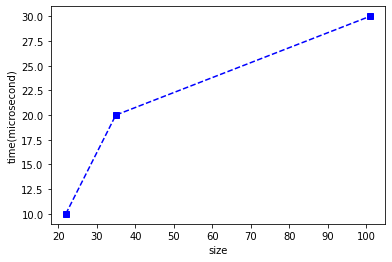

In [277]:
time=[21.9,34.9,101];size=[10,20,30]
plt.plot(time,size,'bs--')
plt.xlabel('size')
plt.ylabel('time(microsecond)')
plt.show()


In [231]:
a=np.arange(32000)
b=a.reshape(20,40,40)

In [232]:
print(a.itemsize,b.itemsize)

4 4


This will be stored in memory in a buffer that contains 32000 ascending integers from 0 to 31999. As we have seen before a and b are stored in the same memory block. The way in which NumPy differentiates how to operate on them is by characterizing them by their different strides. Strides are tuples of bytes to step in each dimension when traversing an array. In practice they are the offset in bytes between an element and the neighboring one in every direction. Strides are shown explicitly using the instruction arr.strides:

In [233]:
print(a.shape,a.strides)
print(b.shape,b.strides)
print(8*40,8*40*40)

(32000,) (4,)
(20, 40, 40) (6400, 160, 4)
320 12800


In [234]:
a.strides

(4,)

The last number, 8, of the strides refers to the size of each element in the array, i.e., it is always the itemsize. The other numbers refer to the number of bytes forward necessary to access the next element along the other axes. The total number of bytes is called offset and is calculated as offset = sum(indexes * a.strides). For example, for the initial array a[n] every element is accessed at the position 
```python
offset = n*a.strides[0]
```
, while b[i,j,k] is accessed calculating its associated memory offset as 
```python
offset = i*b.strides[0]+j*b.strides[1]+k*b.strides[2]
```
in bytes. To obtain the element location one has to divide by b.itemsize. For example,

In [235]:
b[2,3,4]

3324

In [236]:
(2*b.strides[0]+3*b.strides[1]+4*b.strides[2])/b.itemsize

3324.0

### Exercise 13

Create a four dimensional array from of size 3x7x4x5 and verify that the element (2,5,1,4) is the same both using strides and using the python indeces.

In [278]:
# here you can insert your solution
arr=np.arange(420).reshape(3,7,4,5) #matrix of (3,7,4,5) shape
print(arr)
index1=arr[2,5,1,4]
index2=(2*arr.strides[0]+5*arr.strides[1]+1*arr.strides[2]+4*arr.strides[3])/arr.itemsize

if index1==index2:
    print("True")
    


[[[[  0   1   2   3   4]
   [  5   6   7   8   9]
   [ 10  11  12  13  14]
   [ 15  16  17  18  19]]

  [[ 20  21  22  23  24]
   [ 25  26  27  28  29]
   [ 30  31  32  33  34]
   [ 35  36  37  38  39]]

  [[ 40  41  42  43  44]
   [ 45  46  47  48  49]
   [ 50  51  52  53  54]
   [ 55  56  57  58  59]]

  [[ 60  61  62  63  64]
   [ 65  66  67  68  69]
   [ 70  71  72  73  74]
   [ 75  76  77  78  79]]

  [[ 80  81  82  83  84]
   [ 85  86  87  88  89]
   [ 90  91  92  93  94]
   [ 95  96  97  98  99]]

  [[100 101 102 103 104]
   [105 106 107 108 109]
   [110 111 112 113 114]
   [115 116 117 118 119]]

  [[120 121 122 123 124]
   [125 126 127 128 129]
   [130 131 132 133 134]
   [135 136 137 138 139]]]


 [[[140 141 142 143 144]
   [145 146 147 148 149]
   [150 151 152 153 154]
   [155 156 157 158 159]]

  [[160 161 162 163 164]
   [165 166 167 168 169]
   [170 171 172 173 174]
   [175 176 177 178 179]]

  [[180 181 182 183 184]
   [185 186 187 188 189]
   [190 191 192 193 194]
   [1

## Vector Product

The inner product, np.dot() in NumPy, is the most common operation between arrays. It is equivalent to the inner product between 1-D arrays or to matrix multiplication between 2D arrays. It is defined on n-dimensional arrays as the sum product over the last axis of the first array and the second-to-last of the second array. For example,

In [164]:
np.dot(np.random.rand(1000),b=np.random.rand(1000))/1000

0.24861085483345027

will give you a number close to 0.25, since np.random.rand() is a uniformly extracted random number between 0 and 1. Similarly

In [165]:
np.dot(np.random.rand(100,100),b=np.random.rand(100,100))/100

array([[0.25504957, 0.25047125, 0.28229139, ..., 0.29694727, 0.28362258,
        0.23671994],
       [0.23762263, 0.23406569, 0.29077593, ..., 0.29048714, 0.28270801,
        0.26403732],
       [0.24505081, 0.21548058, 0.24124113, ..., 0.26727559, 0.24682204,
        0.24695731],
       ...,
       [0.23235971, 0.23245679, 0.23303664, ..., 0.27347944, 0.24807068,
        0.22919601],
       [0.2368277 , 0.23259818, 0.27164501, ..., 0.30658385, 0.27736557,
        0.25767249],
       [0.27046394, 0.21457327, 0.27811043, ..., 0.27775498, 0.27388278,
        0.24847792]])

will result in a 100 × 100 matrix of numbers normally distributed around 0.25. 

Outer products are called by np.outer() and are an easy way to create an x, y regular mesh:

In [166]:
a=np.arange(0,11,1)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [167]:
b=np.ones(11)
b

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [168]:
x=np.outer(a,b)
#print(x)
x2=np.outer(b,a)
#print(x2)
(x-x2)**2

array([[  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.],
       [  1.,   0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81.],
       [  4.,   1.,   0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.],
       [  9.,   4.,   1.,   0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.],
       [ 16.,   9.,   4.,   1.,   0.,   1.,   4.,   9.,  16.,  25.,  36.],
       [ 25.,  16.,   9.,   4.,   1.,   0.,   1.,   4.,   9.,  16.,  25.],
       [ 36.,  25.,  16.,   9.,   4.,   1.,   0.,   1.,   4.,   9.,  16.],
       [ 49.,  36.,  25.,  16.,   9.,   4.,   1.,   0.,   1.,   4.,   9.],
       [ 64.,  49.,  36.,  25.,  16.,   9.,   4.,   1.,   0.,   1.,   4.],
       [ 81.,  64.,  49.,  36.,  25.,  16.,   9.,   4.,   1.,   0.,   1.],
       [100.,  81.,  64.,  49.,  36.,  25.,  16.,   9.,   4.,   1.,   0.]])

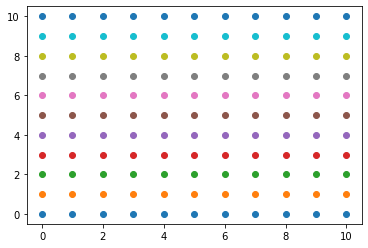

In [170]:
import matplotlib.pyplot as plt
y=np.outer(b,a)

plt.plot(x,y,'o');plt.show()

NumPy allows composing large arrays combining blocks of one array scaled by another. This operation is called Kronecker product, and we will intensively use it to build large operators for two-dimensional continuum mechanics. For example,

In [171]:
mix=np.kron(np.eye(3), np.ones((2,2)))
print(mix)


[[1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1.]]


### Exercise 14

Using *np.kron()*, *np.ones()*, *np.zeros()*, etc Create a matrix made of 6x6 blocks, each of 3x3 matrix of 0,1,2. You choose the shape of the 3x3 matrix, the coolest you can come up. 

In [275]:
# here you can insert your solution

arr=np.ones((3,3))
a=np.arange(0,3)

arr2=np.array([a,a,a])
#creating the final array
mix=np.kron(arr, arr2)
print(mix)






[[0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]
 [0. 1. 2. 0. 1. 2. 0. 1. 2.]]


## Linear Algebra

All the linear algebra tools that we will need are already efficiently implemented through the standard optimized ATLAS LAPACK and BLAS libraries. Ultimately all linear algebra routines expect to operate on a 2-dimensional array. There is also a matrix type in NumPy but its use is discouraged since it is possible to obtain the same result by using arrays only.

Linear algebra has many subprograms that run routines for decompositions such as Cholesky, QR and Singular Value. They can be very important for many problems, however they do not apply for the problems that we will address in this volume. The interested reader can refer to the regularly updated SciPy manual at http://docs.scipy.org/doc/numpy/reference/routines.linalg.html. 

Linear algebra (LA) routines are accessed through the module numpy.linalg:

In [ ]:
import numpy.linalg as linalg

An often employed tool is linalg.norm() both for calculating the size of a 1D (vector) and 2D (matrix) arrays. Norm, that is just the square root of the sum of the square of all the elements of a n-dimensional array, could be also calculated by the definition, but the numpy.linalg implementation can be one order of magnitude as more efficient. Let us for example benchmark the calculation of a 100 × 100 array norm:

In [258]:
a=np.arange(-1000,1001,1)
b=np.arange(2001)
x=np.outer(a,b); 
normVectorized=np.sqrt(np.sum(np.sum(x**2)))
%timeit -n1 -r1 normVectorized=np.sqrt(np.sum(np.sum(x**2)))
print(normVectorized)
print(x.shape)

14 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
43620.619711324594
(2001, 2001)


In [261]:

print(np.linalg.norm(x))
%timeit -n 1 -r1 np.linalg.norm(x)

1334833656.261345
20.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Determinants are often employed in linear algebra because they are related to the invertibility of a matrix, and on whether the associated linear system of equations is solvable (a smaller determinant can indicate that some eigenvalues are close to zero, which makes inversion harder). However, to calculate the determinant of extremely large 2D arrays as we will often do in this volume is computationally so demanding that we will do it only for small problems. Let us calculate the determinant of few random matrices, 10 × 10 and 100 × 100, for example:

In [263]:
dets=np.zeros(10)
for i in np.arange(10): dets[i]=np.linalg.det(np.random.rand(10,10))
dets

array([ 0.03559064, -0.03600961,  0.03560392, -0.01240456,  0.04499659,
        0.01656943, -0.02684062, -0.00116341,  0.00433706,  0.00411315])

In [264]:
for i in np.arange(10): dets[i]=np.linalg.det(np.random.rand(100,100))
dets

array([ 7.37177298e+24, -4.55243002e+24, -3.03974643e+25, -1.24285709e+25,
       -3.75118025e+25, -4.06341761e+25,  2.68343846e+25, -2.25745355e+24,
       -6.99912063e+24, -4.86573854e+24])